# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guiuan
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | kharp
Processing Record 5 of Set 1 | tolanaro
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | laguna
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | shelui
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | general pico
Processing Record 16 of Set 1 | shenjiamen
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | longgang
Processing Record 19 of Set 1 | saksaul'skiy
City not found. Skipping...
Processing Record 20 of Set 1 | tofol
Processing Record 21 of Set 1 | vilyuchinsk
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guiuan,11.0333,125.7247,28.87,78,100,7.11,PH,1690918192
1,bredasdorp,-34.5322,20.0403,7.21,82,99,1.44,ZA,1690918193
2,port-aux-francais,-49.3500,70.2167,5.42,98,100,11.97,TF,1690918193
3,kharp,66.8014,65.8081,18.76,70,100,2.49,RU,1690918193
4,tolanaro,-25.0319,46.9987,21.04,73,40,6.17,MG,1690918193


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guiuan,11.0333,125.7247,28.87,78,100,7.11,PH,1690918192
1,bredasdorp,-34.5322,20.0403,7.21,82,99,1.44,ZA,1690918193
2,port-aux-francais,-49.3500,70.2167,5.42,98,100,11.97,TF,1690918193
3,kharp,66.8014,65.8081,18.76,70,100,2.49,RU,1690918193
4,tolanaro,-25.0319,46.9987,21.04,73,40,6.17,MG,1690918193


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

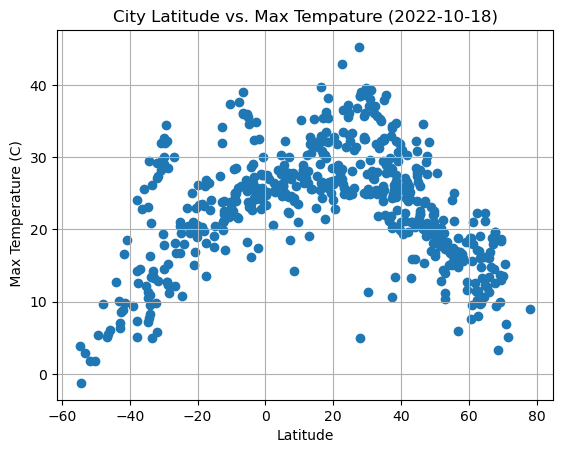

In [16]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]
plt.scatter(x_value, y_value, marker ="o")  
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel(" Max Temperature (C)")
plt.title("City Latitude vs. Max Tempature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

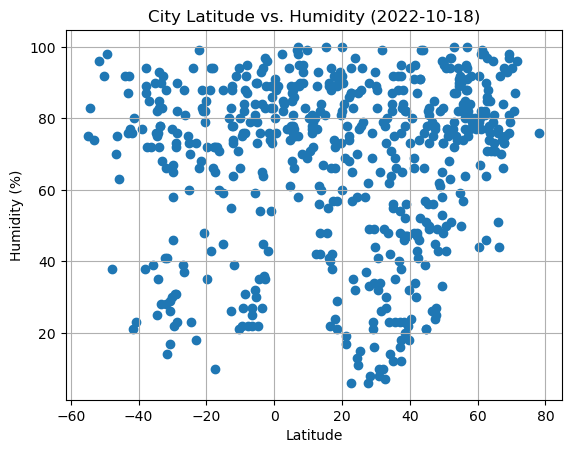

In [17]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df['Lat']
y_value = city_data_df["Humidity"]
plt.scatter(x_value, y_value,  marker="o")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

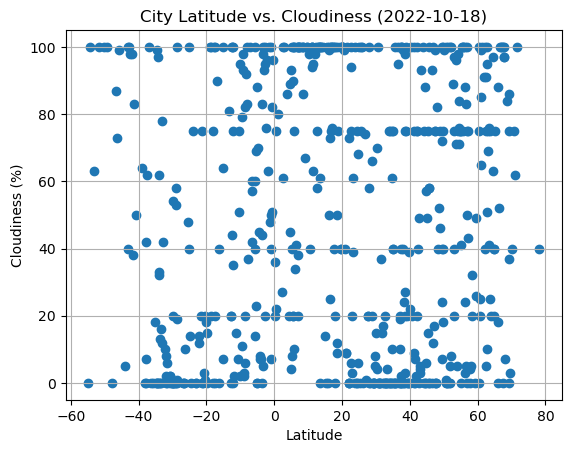

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df['Lat']
y_value = city_data_df["Cloudiness"]
plt.scatter(x_value, y_value, marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

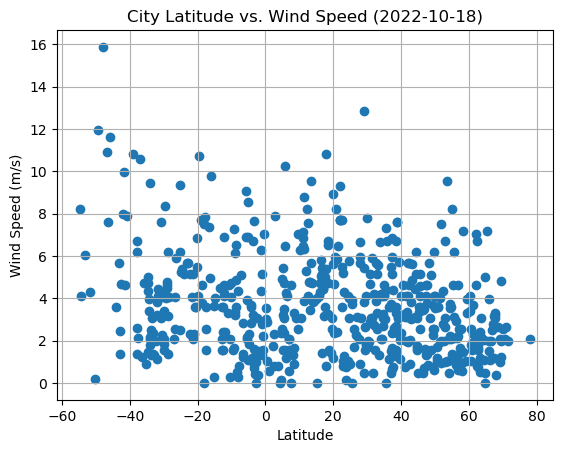

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df['Lat']
y_value = city_data_df["Wind Speed"]
plt.scatter(x_value, y_value, marker="o")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def regression_line(x_value, y_value, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guiuan,11.0333,125.7247,28.87,78,100,7.11,PH,1690918192
3,kharp,66.8014,65.8081,18.76,70,100,2.49,RU,1690918193
5,bethel,41.3712,-73.4140,26.12,48,75,4.12,US,1690918193
6,laguna,38.4210,-121.4238,32.27,46,0,3.60,US,1690918193
8,qaqortoq,60.7167,-46.0333,7.65,80,25,1.79,GL,1690918194


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,7.21,82,99,1.44,ZA,1690918193
2,port-aux-francais,-49.3500,70.2167,5.42,98,100,11.97,TF,1690918193
4,tolanaro,-25.0319,46.9987,21.04,73,40,6.17,MG,1690918193
7,adamstown,-25.0660,-130.1015,20.40,60,100,9.36,PN,1690918193
9,shelui,-4.3667,34.2000,23.51,35,45,3.66,TZ,1690918194


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4026274701827037


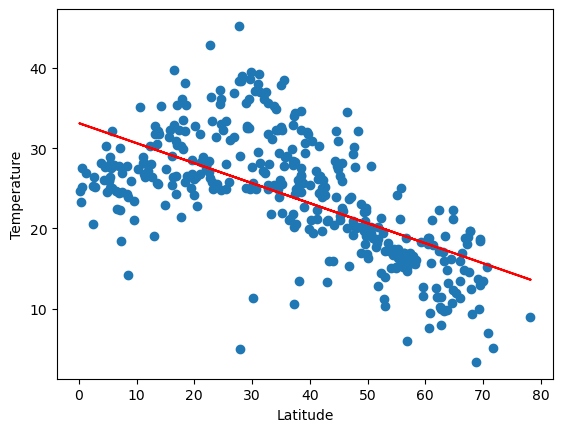

In [36]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_value,"r-")
plt.annotate(line_eq, (-50,30), color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.4731578027146522


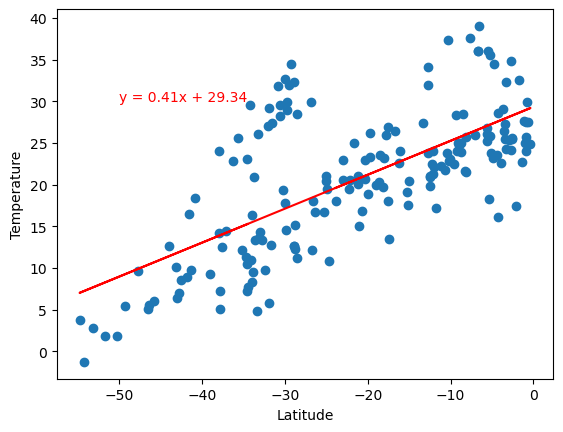

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,30), color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: As Latitude approaches 0 the temperture rises

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00461709092530205


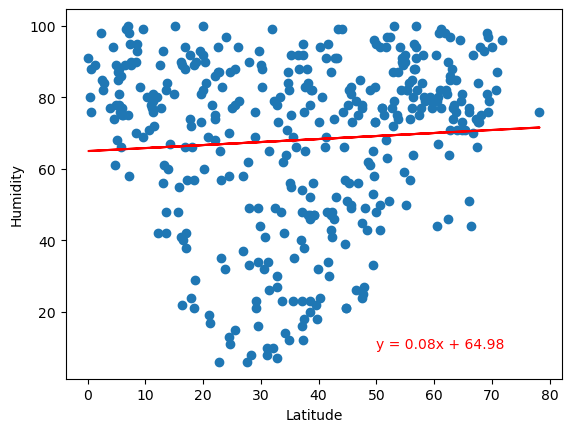

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50,10), color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.001288169445700695


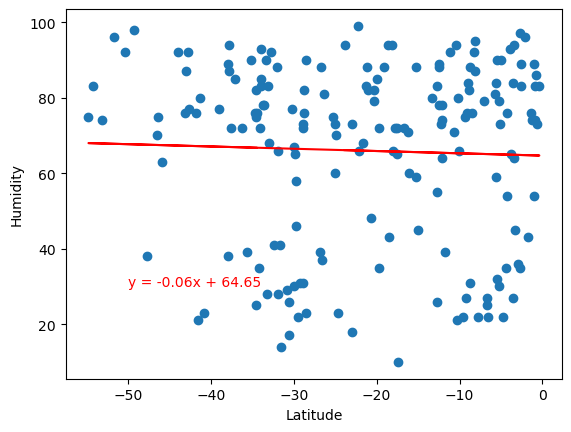

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,30), color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: There doesnt seem to be an apparent relationship

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.007250711429376336


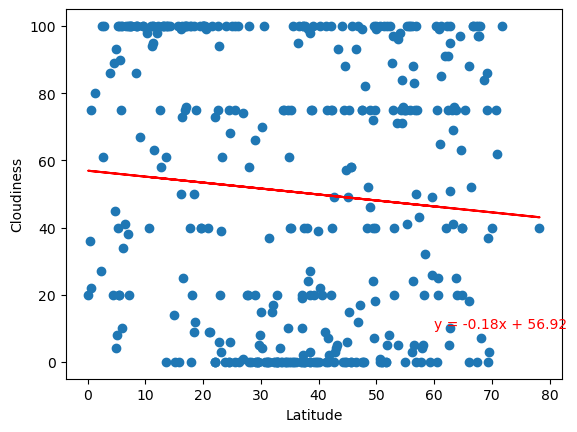

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (60,10), color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.014634070024184744


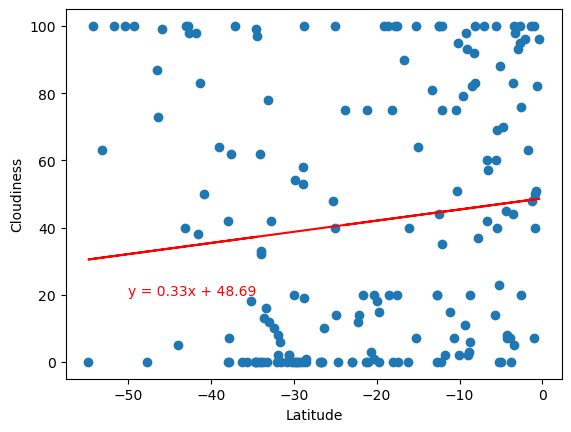

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,20), color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: Both graphs are displaying the opposite. Dont think there is a relationship

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.051117492612034625


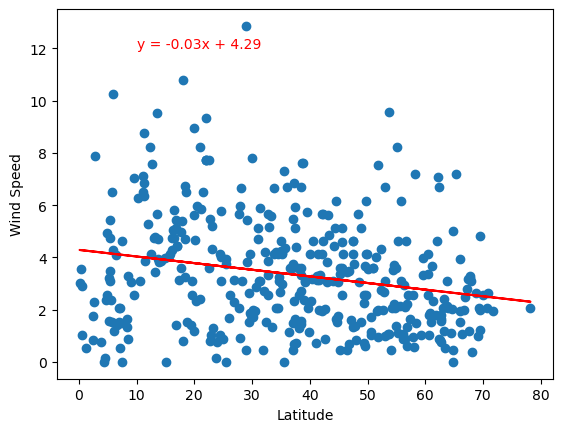

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,12), color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.08351331294017962


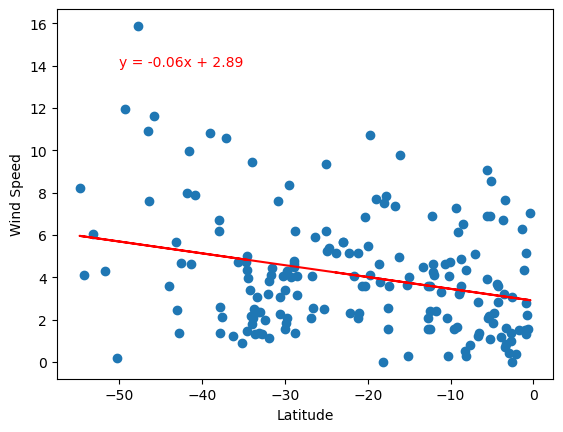

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,14), color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: As latitude inscreases so do the wind speeds